Notebook to compare global mean temperature at 2m from NextGEMS simulations (using Low Resolution Archive) with ERA5 eanalysis data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from aqua import Reader, catalogue
catalogue();

IFS	tco3999-ng5	2.8km experiment, coupled with FESOM
	- ICMGG_atm2d	original 2d output
	- ICMU_atm2d	original 2d output (lnsp)
	- ICMU_atm3d	original 3d output
	- interpolated_global	NN interpolation to 5400x2700 grid (lon=[-180,180], lat=[-90, 90])
IFS	tco2559-ng5	4km experiment, coupled with FESOM
	- ICMGG_atm2d	original 2d output
	- ICMU_atm2d	original 2d output (lnsp)
	- ICMU_atm3d	original 3d output
	- interpolated_global	NN interpolation to 5400x2700 grid (lon=[-180,180], lat=[-90, 90])
	- lra-r100-mon	LRA monthly data 1x1 deg regular grid
IFS	tco1279-orca025	9km baseline, coupled to NEMO, deep conv ON
	- ICMGG_atm2d	original 2d output
	- ICMU_atm2d	original 2d output (lnsp)
	- ICMU_atm3d	original 3d output
	- lra-r100-mon	LRA monthly data 1x1 deg regular grid
IFS	test-tco2559	4km experiment, coupled with FESOM
	- ICMGG_atm2d	2d output
	- ICMU_atm3d	3d output
IFS	test-tco79	TCO79 test data
	- short	original 2d output
	- long	coarse IFS data 1y

FESOM	tco3999-ng5	2.5km experiment,

Explore ERA5 dataset (used as reference)

In [3]:
reader = Reader(model='ERA5',exp='era5',source="monthly_inst")
data = reader.retrieve()
data

2023-05-22 18:24:45 :: Reader :: WARNING  -> Source areas file not found: /work/bb1153/b382075/nextgems/weights/cell_area_ERA5_era5_monthly_inst.nc
2023-05-22 18:24:45 :: Reader :: WARNING  -> Attempting to generate it ...
2023-05-22 18:24:45 :: Reader :: WARNING  -> Source grid: /work/bb1153/b382075/nextgems/grids/n320_unstructured.nc
/work/bb1153/b382216/mambaforge/envs/aqua/lib/python3.10/site-packages/intake_esm/search.py:106: UserWarning: Query returned zero results.
  warn(message)
/work/bb1153/b382216/mambaforge/envs/aqua/lib/python3.10/site-packages/intake_esm/core.py:882: UserWarning: There are no datasets to load! Returning an empty dictionary.
  warn('There are no datasets to load! Returning an empty dictionary.')


IndexError: list index out of range

Example of dataset of Low Resolution Archive available for ICON

In [2]:
reader = Reader(model='ICON',exp='ngc2009',source="lra-r100-mon")
data = reader.retrieve()
data

Plot of global mean temperature

Text(0.5, 1.0, 'global mean temperature at 2m')

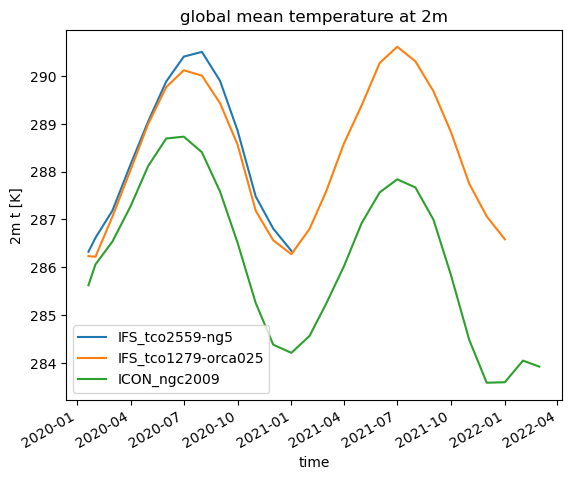

In [4]:
model_list = ["IFS", "ICON"]
exp_name = {"IFS": ["tco2559-ng5","tco1279-orca025"], "ICON": ["ngc2009"]}
source = "lra-r100-mon"

data = {}
for model in model_list:
    for exp in exp_name[model]:
        reader = Reader(model=model, exp=exp, source=source, regrid="r100")
        data[(model, exp)] = reader.retrieve()["2t"]

plt.figure()
for model in model_list:
    for exp in exp_name[model]:
        reader.fldmean(data[(model, exp)]).plot(label=f"{model}_{exp}")
plt.legend()
plt.ylabel("2m t [K]")
plt.title("global mean temperature at 2m")